# Pandas

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
help(pd)

Like the data.frame in R, the functionality offered by pandas revolves around in-memory data manipulation.<br><br>
There are two important classes defined in the pandas library:
1. **Series**, a one-dimensional ndarray with *labeled axis* (including time series) & 
2. **DataFrame**, a two-dimensional size-mutable, potentially heterogeneous tabular data structure with *labeled axes*

DataFrames can be thought of as a dict-like container for Series objects. The *labeled axes* a.k.a. indices is what makes pandas fast and powerfull, but also sometimes confusing if you come from you are used to other datasets like R's data.frame. Give yourself time to get used to the concepts, it will  be worth it.

# Series

A series (think time-series) is a sequence of values where the elements are labelled **with an index**.<br>
You can think of a Series a generalized 1D numpy array.<br>
When no index is explicitly specified, pandas uses by default the sequence 0 ... n.<br>
When working with timeseries the index is usually a timestamp.<br>

In [2]:
## the easiest to create a Series is probably
s1 = pd.Series([2,5,3,4], name='My First Series')
s1
## note the column on the left (0, ..., 3) is the index column

0    2
1    5
2    3
3    4
Name: My First Series, dtype: int64

## Main Components

In [3]:
## The main pandas objects consist of three major parts
print('Name         :', s1.name)
print('Values       :', type(s1.values), 'with values', s1.values)
print('Index/Labels :', s1.index)
print('Data Type    :', s1.dtype)

Name         : My First Series
Values       : <class 'numpy.ndarray'> with values [2 5 3 4]
Index/Labels : RangeIndex(start=0, stop=4, step=1)
Data Type    : int64


A Series can be viewed as a **generalized numpy array**.<br>
As shown above the actual data in a series lives in a numpy.ndarray.<br>
The difference is that pandas Series (& DataFrames) have row **labels contained as an index**.<br>
An index can be seen as an immutable array.<br>
Another way of thinking about a Series is as a specialized dictionary, where the index values are the keys mapping to the Series values.

# Data Types

Before we dive into the ways pandas can be used to manipulate data, I want to touch on the types of data that can live in a pandas Series / DataFrame.
<br><br>
Pandas is build on top of NumPy. Therefore pandas offers all the datatypes NumPy offers.<br>
A numpy array consists of a contigeous linear collection of elements. When the elements are integer, or float, or some other type that uses a given number of bits in memory, pandas is fast and efficient.<br>
As in any other language, when the elements are of variable length, what gets captured is the reference. The actual memory used is allocated outside the array.<br>
Take strings, strings typically have variable lengths. So when we have a column of strings pandas stores an array of string objects, consisting of some string properties, like: length & location there the actual bits live, & ... Lets get an example:

In [27]:
## don't worry to much if you do not understand all syntax here
answcat = ['strongly disagree', 'disagree', 'neutral', 'agree', 'strongly agree']
s1 = pd.Series(np.random.choice(answcat,p=[0.2]*5,size=50))
s1.head()

0          disagree
1           neutral
2             agree
3    strongly agree
4          disagree
dtype: object

Note that the dtype = object. This is pandas way of telling you that it is keeping object references.<br>
To explain this a bit further, lets look at the memory_uasege():

In [16]:
s1.memory_usage()

528

This memory usage describes what the actual numpy arrays uses, but does not count the actual memory taken by the strings. To get that do: 

In [28]:
usage_as_strings = s1.memory_usage(deep=True)
usage_as_strings

3442

## Categorical Data

Here's where the categorical type comes in. Instead of storing the actual strings, it stores integers that serve as contain an index into some lookup table of actual values, more or less like:

In [22]:
anscat_categorical = {1:'strongly disagree', 2:'disagree', 3:'neutral', 4:'agree', 5:'strongly agree'}
example_short = np.random.choice(range(1,6),p=[0.2]*5,size=10)
example_long  = np.array([anscat_categorical[e] for e in example])
np.vstack([example_short, example_long]).T

array([['3', 'strongly disagree'],
       ['5', 'strongly disagree'],
       ['1', 'disagree'],
       ['2', 'agree'],
       ['1', 'strongly agree'],
       ['5', 'strongly disagree'],
       ['3', 'strongly disagree'],
       ['5', 'strongly agree'],
       ['5', 'neutral'],
       ['5', 'strongly disagree']], dtype='<U21')

A way to make the variable *categorical* in pandas is using the astype('categorical'):

In [31]:
s1 = s1.astype('category')
s1[:5]

0          disagree
1           neutral
2             agree
3    strongly agree
4          disagree
dtype: category
Categories (5, object): [agree, disagree, neutral, strongly agree, strongly disagree]

As you can see, the dtype is now **category** with possible values listed.<br>
Moreover, the memory usage is now:

In [32]:
usage_as_category = s1.memory_usage(deep=True)
print(f'The usage as category = {usage_as_category} which is {100*usage_as_category/usage_as_strings:.2f}%')

The usage as category = 674 which is 19.58%


We are only using 20% of the memory, in real world examples this is much more dramatic (if the number of possible strings is small). Apart from this gain in memory, all sort of other data manipulations become much faster (grouping, aggregations, selections, ...)

# Index

## RangeIndex

Pandas automatically creates an index if none is given. The index created will be a RangeIndex, representing a sequence of integers.

In [ ]:
s1 = pd.Series([7,5,3], name='My Series')
print(s1,'\n')
print(s1.index)

Apart from the default index that gets created if you do not supply one, you can create one explicitely.

In [ ]:
## we also get a RangeIndex when we specify: index=range(...)
s1 = pd.Series([7,5,3], name='My Series', index=range(5,8))
print(s1,'\n')
print(s1.index)

The index values relates to a specific element, and does not change if an element is removed:

In [ ]:
## drop returns a new Series with the specific index value removed, but leave the original unchanged, unless ...
## the argument inplace=True is given.
s1.drop(6, inplace=True)
s1

The remaining elements keep their index value.<br>
Also note that RangeIndex(start=5, stop=8, step=1) can no longer be valid.<br>
Under the hood, pandas managed this by changing the index type:

In [ ]:
s1.index

There is a whole hierarchy of Index classes defined in pandas.<br> 
For daily use, you let pandas take care of the details.

In [ ]:
## for the interested, or when you need it, you can find out much about the hierarchy using the %pserach magic
%psearch pd.core.indexes.[a-zA-Z]*

## Index: Any Hashable Type

An index doesn't have to be integer based. It can be, and often is, strings:

In [ ]:
s1 = pd.Series([7,5,3], name='My Series', index=['Jan','Feb','Mar'])
print(s1,'\n')
print(type(s1.index), s1.index)

Actually, an **index can be any hashable data type**.<br><br>
A hashable data type is a data type that provides the method \_\_hash\_\_(). Roughly speaking all primitive data types are hashable and the unmutable collections are hashable as well. As examples, lists and dicts are not allowed, but you could use a tuple as an index.

In [ ]:
## many types are hashable in Python: like strings
'a string'.__hash__()

In [ ]:
## or, more adventurous, functions
def greater_than_two(a): return(a>2)
greater_than_two.__hash__()

In [ ]:
## or tuples
(1,2,3).__hash__()
## please note that tuples are also used in MultiIndex (discussed below), so the syntax has some gotcha's

In [ ]:
## as an example: to create a Series with an index of type tuple 
s1 = pd.Series([11,22,33], name='s1', index=[(1,1),(2,2),(3,3)])
print(s1,'\n')
print(type(s1.index))

Also, an index does not have to be unique:

In [ ]:
## note: list('aba') --> ['a','b','a']
s3 = pd.Series([1,2,3], name='s1', index=list('aba'))
s3

## DateTimeIndex

An important type of index used in **time series** is the **DatetimeIndex**.<br>
The DatetimeIndex class provides lots of functionality around date time based indices.<br><br>
Pandas provides some usefull functions to generate these, like **date_range**:

In [ ]:
## to create an index of a sequence of consecutive days, use freq='D'
pd.date_range(start='2019-03-26', end='2019-04-02', freq='D')

So if we have data containing daily maximum temperatures, a natural way to store this is given by:

In [ ]:
idx = pd.date_range(start='2019-03-26', end='2019-04-02', freq='D')
daily_max_temp_degree_c = pd.Series([12,13,14,13,15,14,15,15], name='Daily Max Temp C', index=idx)
daily_max_temp_degree_c

It is also possible to specify multiples in the *freq=* notation:

In [ ]:
## so every Monday from 2019-03-25 to 2019-04-05 is - the day_name() method returns the day name ...
print('Check: 2019-03-25 is a', pd.to_datetime('2019-03-25').day_name())
## to define multiples, put an integer before the period, so: freq='D' is daily and freq='7D' is weekly
pd.date_range(start='2019-03-25', end='2019-04-15', freq='7D')
## note that '2019-04-15' is included

In [ ]:
## or let's say we want two Mondays
pd.date_range(start='2019-03-25', periods=2, freq='7D')

In [ ]:
## or something with working days using freq='C'
idx = pd.date_range(start='2019-03-26', end='2019-04-02', freq='C')
pd.Series([f"{dt.day_name()} work {hr}Hr {':-)' if (hr<8) else ':-('}" for dt,hr in zip(idx, [8,8,8,3,8,8])], 
          name='Work Pattern', 
          index=idx)

[Link](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) to more info on frequency aliases.

Pandas provides usefull methods to down/upsample timeseries using **resample**:

In [ ]:
## create a slightly bigger Series, to demonstrate down sampling
s4  = pd.Series(np.random.randn(35), index=pd.date_range(start='2019-03-26', periods=35, freq='D'))
s4.head(n=7)

In [ ]:
## to down sample to one record per week --> taking the last value of the week
s4.resample('W', label='right').last()
## label='right' means: the interval is labelled using the 'ending Sunday'
## .last() means: take the last value in the interval -- other option: first, mean, median, ...

In [ ]:
## check what pandas is doing ... selecting the Sunday's --> see discussion on selection later :-)
s4.loc[s4.index.day_name() == 'Sunday']

In [ ]:
## more generically, instead of using one of the many predefined methods, like: last, first, mean, std, ...
## we could define our own aggregation function, for instance: lag 1 autocorrelation:
def my_aggregation_fun(srs): return(np.NaN if (len(srs)<4) else srs.autocorr(lag=1)) ## NaN is len < 4
s4.resample('M', label='right').agg(my_aggregation_fun)

*.resample()*:
1. *splits* the series into a set of smaller series (as defined by the first argument),
2. *apply* the function, here my_aggregation_fun, and 
3. *combines* the result back into a resulting Series.

This **split-apply-combine** pattern is present everywhere in data-science workflows, and pandas has some nice syntax to do this using *groupby()* on which more later.

## Index Viewed As Set

In many ways an index behaves like a set:

In [ ]:
s51 = pd.Series([7,5,3,7,1], index=pd.Index([1,2,3,4,5]))
s52 = pd.Series([4,6,3,2,8], index=pd.Index([    3,4,5,6,7]))

In [ ]:
## when using the in operator, pandas checks if the element in the index
print(f'check: 7 in s51 gives: {7 in s51}')
print(f'check: 2 in s51 gives: {2 in s51}')
## equivalent to: _ in s51.index

More, specifically, the operators: &, |, and ^ behave like set operations

In [ ]:
## the indices that are in both sets --> logical AND
s51.index & s52.index

In [ ]:
## the indices that are in either sets --> logical OR
s51.index | s52.index

In [ ]:
## the indices that are in only one of the sets --> logical XOR
s51.index ^ s52.index

**GOTCHA**: an index behaves like an *immutable array* for the math operators: -, +, \*, and /

In [ ]:
print(s51.index + s52.index)
print(s51.index - s52.index)
print(s51.index * s52.index)
print(s51.index / s52.index)

## MultiIndex

Finally, an index can have multiple levels.<br>
As an example assume we have end of month data on accounts.<br>
Using the from_arrays() method on the MultiIndex class:<br>

In [ ]:
s6  = pd.Series(np.random.randn(9), 
                name    = 'Fictitious Balance', 
                index   = pd.MultiIndex.from_arrays([  [1,1,1,2,2,2,3,3,3], 
                                                       ['201801','201802','201803']*3
                                                    ], 
                                                    names=['account','yyyymm']
                                                   )
                columns = pd.MultiIndex.from_arrays([  ['atm']*3 + ['contactless']*3 + ['mobile']*3,
                                                       ['nr','vol','avg']*3
                                                    ], 
                                                    names=['account','yyyymm']
                                                   )
              )
s6

In [ ]:
['atm']*3,['contactless']*3,['mobile']*3

This becomes rather usefull when selecting or aggregating:

In [ ]:
s6.loc[:,'201803']

Many aggregation methods defined on the Series (and DataFrames) take *level=* as argument:

In [ ]:
## aggregate by account
s6.sum(level='account')

In [ ]:
## aggregate by year/month
s6.sum(level='yyyymm')

There will be more on aggregating, slicing, & dicing data later on. For now, observe that MultiIndex (or hierarchical indexing) can lead to natural / readable syntax.

# DataFrame

The **DataFrame** lies at the hart of many Data Science workflows. It holds a two-dimensional table of data where each column can be be of a different data type. A DataFrame is build from a set of Series, all sharing the same index.<br><br>
Let's start by creating a DataFrame from two Series:

In [ ]:
## lets create some random data
s1 = pd.Series(np.random.randn(4), name='series1', index=[1,2,3,4])
s2 = pd.Series(np.random.randn(4), name='series2', index=[3,4,5,6])
s3 = pd.Series(np.random.randn(4), name='series2', index=[5,6,7,8])
## the __init__() method of DataFrame accepts a dict of Series
df = pd.DataFrame({'s1': s1, 's2': s2, 's3': s3})
df

Note that pandas automatically lines up the indices and fills with NaN where the values are missing!

## Main Components

Just like with Series, the three important part of a DataFrame are:
* columns ==> column index
* index   ==> row index
* values  ==> the data

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.values

To get some summary information regarding the DataFrame, use *.info()*:

In [ ]:
df.info()

# Selecting Data

We already used indexing / slicing / selecting data from a Series.<br>
In the following we will take a deep-dive into selecting data from a DataFrame.<br><br>

There are two ways to reference elements of the series:
1. **.loc[]** & **.at[]**: using **index values** & 
2. **.iloc[]** & **.iat[]**: **location based** (n-th element & not element with index n)

Note: it is also possible to use the **[]** operator directly.<br>
But, it can be confusing. To be discussed last, once the basics are nailed down
<br><br>
Direct use of operator[] is usefull in the Notebook, but discouraged in production code.<br>
(from the docs) ... *since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the optimized pandas data access methods exposed in this chapter*.

## Single Element

Let's look at some simple examples: *.at[]* & *.iat[]*

In [ ]:
## element with row index = 1 and column (index) = s1 (position 0, 0)
df.at[1,'s1']

In [ ]:
## the same element now using it's position 0, 0
df.iat[0,0]

This is basically all you can do with *.at[]* and *.iat[]*.<br>
They are simple and fast, but less flexible as *.loc[]* and *.iloc[]*.<br>
You could do the same thing using *.loc[]* and *.iloc[]*:

In [ ]:
df.loc[1,'s1']

In [ ]:
df.iloc[0,0]

But *.loc[]* and *.iloc[]* can also deal with more complicated selections.
<br><br>
The use case for *.at[]* & *.iat[]* is simply speed ...
<br><br>
*From the documentation*: Since indexing with **.loc[]** & **.iloc[]** must handle a lot of cases (single-label access, slicing, boolean indexing, etc.), it has a bit of overhead in order to figure out what you’re asking for. If you only want to access a scalar value, the fastest way is to use the **at[]** and **iat[]** methods.

### Timeit

In [ ]:
rs = pd.Series(0,range(10000))
df = pd.DataFrame(np.random.randn(10000,2))

In [ ]:
%%timeit
for i in rs.index: rs.loc[i] = df.loc[i,0] + df.loc[i,1]

In [ ]:
%%timeit
for i in range(10000): rs.iloc[i] = df.iloc[i,0] + df.iloc[i,1]

In [ ]:
%%timeit
for i in rs.index: rs.at[i] = df.at[i,0] + df.at[i,1]

In [ ]:
%%timeit
for i in range(10000): rs.iat[i] = df.iat[i,0] + df.iat[i,1]

The *.at[]* and *.iat[]* show some pretty good speedups here ...
<br><br>
But ... you should **always use 'vectorized computation'** in pandas and numpy (and R and probably any intepreted language that does not have compiler optimizations to make it fast), as show below:

In [ ]:
%%timeit
rs = df.sum(axis=1)

Below we delve into more complex selection mechanisms that allow for vecorized computations on mor complex sub-selections.

## Boolean Indexing

A pattern often used is boolean indexing. To quickly select a subset where some condition holds, we pass in a Series (or array or list) of boolean values.<br>
In pandas boolean indexing is supported using *.loc[]*:

In [ ]:
df = pd.DataFrame(np.random.randn(10,3), columns=['c1','c2','c3'])
df

In [ ]:
## define a simple expression that returns a Series of booleans where column c1 > 0
df.c1 > 0

In [ ]:
## to select all the rows where this condition is True
df.loc[df.c1 > 0]

If you want to use multiple conditions, you **must wrap each condition in ()**:

In [ ]:
df.loc[(df.c1 > 0) & (df.c3 < 0)]

Another way of doing the same is using the query method:

In [ ]:
df.query('c1 > 0 & c3 < 0')

This way of working with your data is what makes pandas work. If you work with poandas (or numpy, R data frames, or ...) you need to become familiar at this way of working. Working with loops will slow your code down and make it much less readable and maintainable.
<br><br>
Let's replace all the negative elements with 0, the bad way and the good way:

In [ ]:
df = pd.DataFrame(np.random.randn(10000,2), columns=['c1','c2'])
df.head()

In [ ]:
%%timeit
## The BAD way. Don't do this!!!!
res = df.copy()
for row_index in range(res.shape[0]):
    for col_index in range(res.shape[1]):
        if res.iat[row_index,col_index] < 0:
            res.iat[row_index,col_index] = 0

In [ ]:
res = df.copy()
for _, col_as_series in res.items(): col_as_series.loc[col_as_series<0]=0
res.head()

In [ ]:
%%timeit
## A better way ...
res = df.copy()
## loop over columns (more on iterating over Series and DataFrames later)
for _, col in res.items():
    ## select elements where col < 0 is True and replace with 0
    col.loc[ col < 0 ] = 0

In [ ]:
%%timeit
## The Good way. Instead do this!!!!
res = df.copy()
## shorter, prettier, and arguably more readable ...
res.where( res < 0, 0 )

## Using List or Array

In [ ]:
df = pd.DataFrame(np.random.randn(10,3), columns=['c1','c2','c3'])
df

In [ ]:
df.loc[[1,6,7,9]]

In [ ]:
df.loc[[1,6,7,9],['c3','c1']]

In [ ]:
## note that negative index values are allowed
df.iloc[[3,2,1], [-1,-2]]

## Slicing

Pandas can select data using the slice notation *lower*:*upper*:*step*<br><br>
**GOTCHA**: index-based slicing using .loc[] **includes** the upper bound!!

In [ ]:
df = pd.DataFrame(np.random.randint(low=1, high=9, size=(5,5)), columns=['c1','c2','c3','c4','c5'])
df

In [ ]:
## rows with index values 1,2, & 3 (upper bound included in index slicing)
df.loc[1:3]

In [ ]:
## rows at position 1 & 2 (upper bound not included in position slicing)
df.iloc[1:3]

In [ ]:
df.loc[1:3,'c1':'c4']

In [ ]:
## first two rows by first two columns
df.iloc[:2,:2]

Since the index does not have to consist of unique values and the index does not have to be increasing or decreasing, slicing with **index** can fail or give unexpected results.<br>
The process is to obtain a index slice is:
1. get unique position of left value (throws KeyError if not unique)
2. get unique position of right value (throws KeyError if not unique)
3. return the sequence between these positions

In [ ]:
## lets create a series with an index that is not strictly increasing or decreasing and contains duplicate values 
df = pd.Series([1,2,3,4,5,6,7,8],index=list('acdfebae'))
## index value 'a' not unique
try:
    print(df.loc['a':'d'])
except Exception as e:
    print(e)
## index value 'e' not unique
try:
    print(df.loc['b':'e'])
except Exception as e:
    print(e)
## index values 'f' & 'b' unique, but ... does this make sense?
try:
    print(df.loc['f':'b'])
except Exception as e:
    print(e)

In [ ]:
df.index.is_unique

In [ ]:
df.index.is_monotonic

Slicing using the **position** based syntax is always unambiguous!

## Callable Function

Finally, you can pass in a function (or callable) that takes one argument (the calling Series or DataFrame) and returns valid output for indexing.

In [ ]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(low=1, high=9, size=(5,5)), columns=['c1','c2','c3','c4','c5'])
df

In [ ]:
## all rows that have a column max
def select_rows_with_1s(df): 
    return((df==1).sum(axis=1) > 0)

## all rows that have a column containing a column max
def select_rows_with_column_max(df):
    return(set(df.idxmax(axis=0)))

## put the functions in a dict
funs = {'1': select_rows_with_1s, '2': select_rows_with_column_max}

In [ ]:
ixfun = input('''
1: to select all rows that have at least one 1
2: to select all rows that contain a column max
Choose your function: ''')

df.loc[ funs[ixfun] ]

## Shortcut: [] directly on DataFrame[]

Finally, you can use the syntax *DataFrame[]*. This syntax is **very** confusing if you do not understand the basics. The behaviour of *DataFrame[]* depends on the arguments given:

In [ ]:
## lets create a dataframe that shows of the behaviour.
## spend some time in understanding this, it will pay off!!
df = pd.DataFrame(np.random.randn(5,3), index=[1,2,3,4,5], columns=[1,2,3])
df

Single value --> argument interpreted as column index value / name

In [ ]:
df[1]

List of values --> argument interpreted as list of column index values / column names

In [ ]:
df[[3,1]]

List of booleans --> argument interpreted as list of booleans for the rows

In [ ]:
df[[True,False,False,True,False]]

Slice --> argument interpreted as a row slice using position (0-based)

In [ ]:
## position 1 is the second row & since we are doing positional slicing the upper bound 4 is excluded
df[1:4]
## note: 1,2,3 (excluding 4) in position have index values: 2,3,4

You often see these selections chained:

In [ ]:
df[[True,False,False,True,False]][[3,1]]

In summary:

| DataFrame[] | DataFrame.loc[] / DataFrame.iloc[] | position / index |
| --- | --- | --- |
| df[1] | df.loc[:,1] | index based |
| df[[1,2]] | df.loc[:,[1,2]] | index based |
| df[[True, False, ...]] | df.loc[[True, False, ...],:] | n/a |
| df[1:4] | df.iloc[1:4,:] | position based |

Two final remarks:
1. when column names do not clash with the Python reserved words / special characters then<br>
```df['col1']``` is equivalent to ```df.col1``` (**this get used all the time!**)
2. use: ```df[condition] = replacement``` to replace all values in a DataFrame base on a matrix of booleans

In [ ]:
df.rename(columns={1:'col1',2:'col2',3:'col3'}, inplace=True)
df

In [ ]:
df.col2

In [ ]:
df < 0

In [ ]:
df[df<0] = 0
df

## Non-Existing Row/Column Index

Referencing a key that does not exist, will throw a KeyError exception.<br>
Assigning to a key that does not exist, will add the index and assign the value!

In [ ]:
df = pd.DataFrame(42,index=['a','b'],columns=['c1','c2'])
try: 
    print(df.loc['c'])
except KeyError as e:
    print('KeyError exception --> key missing:', e,)

In [ ]:
df.loc['c','c2'] = 42
df

In [ ]:
df.loc['c','c3'] = 42
df

In [ ]:
df.loc[:,'c4'] = 84
df

Note that since a DataFrame is a collection of Series, indexed by their name (aka column name):
* adding a column using the above syntax is efficient
* adding a row by using the above syntax is very inefficient. Worse case:
  * a new numpy.array for each column needs to be made
  * all the data needs to be copied over
  * the original deleted (by the garbage collector at some later point)

## IndexSlice For Complex MultiIndex Cases

In certain complex multi-index cases slicing is not possible using tuple notation.<br>
More specifically when you want to keep one level of a multi index fixed and slice other levels.<br>
This sound complicated, so lets generate an example:

In [ ]:
df = pd.DataFrame( np.random.randn(15,9), 
                   index   = pd.MultiIndex.from_arrays([  [1]*5 + [2]*5 + [3]*5, 
                                                          ['201801','201802','201803','201804','201805']*3
                                                       ], 
                                                       names=['account','yyyymm']
                                                      ),
                   columns = pd.MultiIndex.from_arrays([  ['atm']*3 + ['contactless']*3 + ['mobile']*3,
                                                          ['nr','vol','avg']*3
                                                       ], 
                                                       names=['account','yyyymm']
                                                      )
                 )
df

In [ ]:
df.index.levels

In [ ]:
df.columns.levels

Lets assume we want the atm data for accounts 1 & 2:

In [ ]:
df.loc[1:2,'atm']

So selections on levels[0] are straightforward, the problem occurs when we want to incorporate different levels. The *.loc[]* can deal with one or two parameters, not more ...
<br><br>
Lets assume we want the 'avg' data for yyyymm: '201801', '201802', & '201803'<br>
What we want is using the tuple natation like:<br>
```
df.loc[(:,['201801','201802','201803']),(:,'avg')]
```

In [ ]:
df.loc[(:,'201801':'201803']),(:,'avg')]

The slice operator : does not work inside the tuple brackets.<br>
This is where the IndexSlice class comes in, we can pass IndexSlice objects into *.loc[]*, where each IndexSlice can be a complex definition of rows / columns to select:

In [ ]:
df.loc[ pd.IndexSlice[:, ['201801','201802','201803']],
        pd.IndexSlice[:, 'avg']
      ]

# Copy Or View

Most methods in pandas will return a copy of the data, but not always!<br>
This is a potential minefield in pandas<br><br>

Here's the rules:
1. If **inplace=True** is provided, it will **modify in-place** (only some operations)
2. An indexer that **sets** using (.loc[]/.iloc[]/.at[]/.iat[] = ) will **set inplace**.
3. An indexer that gets **(part of a) Series** / **complete DataFrame** is **almost always a view**.
4. An indexer that gets a **more complicated subset** of the original is always a **copy**.
5. All **operations** / **methods** generate a **copy**.

In [ ]:
## generate some toy data
s1 = pd.Series(np.random.randn(3), name='s1', index=[0,1,2])
s2 = pd.Series(['a','b','c'],      name='s2', index=[1,2,3])
df = pd.DataFrame({'s1': s1, 's2': s2})
df

In [ ]:
## rule 3: get part of single Series --> view
tmp = df.loc[:3,'s1']
df.loc[1,'s1'] = 99
tmp

In [ ]:
## rule 3: complete DataFrame --> view
tmp = df
df.loc[2,'s2'] = 'X'
tmp

In [ ]:
## rule 4: subset of rows and columns --> copy
tmp = df.loc[:3,['s1','s2']]
df.loc[2,'s1'] = 66
tmp

In [ ]:
df

One question that pops up often on StackOverFlow is about the dreaded SettingWithCopyWarning:

In [ ]:
df[3:4]['s1'] = 33

Since df[3:4]['s1'] returns a copy, and the pandas can deduce that an element is being set ... it warns you that you are setting an element on a temporary copy ... probably not what you were expecting. This error occurs regularly when you are chaining multiple selections.<br><br>
Another form of this error is when you create a varaiable from a view, and later change a value. It's pandas way of warning you: you're about to change the value of the original by setting a value on the view ...

In [ ]:
tmp = df[2:4]['s2']
## more code here
tmp.iloc[0] = 'X'
df

# Operators

In many object oriented programming language you can override the behaviour of operators like: +, -, /, \*, ... for classes. It's what makes NumPy and SciPy (or Matlab, or ...) so elegant for computation.
<br><br>
Just like in NumPy, where a calling an operation on an array returns an array, in pandas many operations are defined for Series and DataFrames and return Series or DataFrames.

## Logical

We have allready used these throughout ...

In [ ]:
s1 = pd.Series([-1,3,-2,5,8])
s1 > 0

In [ ]:
type(s1 > 0)

In [ ]:
df = pd.DataFrame([[-1,3],[-2,5],[8,-2]])
df > 0

## Mathematical

In [ ]:
(s1 + 5) // 3

Since Series and DataFrames consist of NumPy arrays, we can do things like:

In [ ]:
(s1 - np.mean(s1)) / np.std(s1)

In [ ]:
type((s1 - np.mean(s1)) / np.std(s1))

Or lets say we want to normalize a column in a DataFrame to [0,1]:

In [ ]:
df = pd.DataFrame(np.random.randint(1,51,size=(5,2)), columns=['r1','r2'])
df

In [ ]:
## note that we can add a column by assignment, see section 5.7
df['r1_norm'] = (df.r1 - np.min(df.r1)) / (np.max(df.r1) - np.min(df.r1))
df

# Methods

Many methods defined for numpy arrays are also implemented for Series.<br>
For instance, instead of using the Numpy min & max we could do:

In [ ]:
df['r2_norm'] = (df.r2 - df.r2.min()) / (df.r2.max() - df.r2.min())
df

Most methods that use aggregation in their computation have an **axis=** argument. This is used to indicate we want the aggregation column-wise, over axis=0, or row-wise, over axis=1. Note if you do not supply the argument, pandas will use the default axis=0:

In [ ]:
df.sum() ## df.sum(axis=0)

In [ ]:
df.sum(axis=1)

So to compute the column-wise Z-score:

In [ ]:
(df - df.sum()) / df.std()

Or, for the row-wise Z-score:

In [ ]:
df

In [ ]:
## note the [:,np.newaxis] syntax from NumPy
## this 'virtually' expands the the column vector into a matrix with the column repeated
(df - df.sum(axis=1)[:,np.newaxis]) / df.std(axis=1)[:,np.newaxis]

There are on the other hand a whole host of extra methods defined on pandas Series (and DataFrame's).
<br><br>
Below we give a few examples, only touching a small subset of capabilities. But, as before, once you understand the basics, you can figure out how to solve specific problems as and when they appear (with the help of google, stackoverflow, ...).

## Predefined Methods

In [ ]:
df = pd.DataFrame(np.random.randint(1,4,size=(10,5)), columns=['c1','c2','c3','c4','c5'])

In [ ]:
## row median
df.median(axis=1)

In [ ]:
## quantiles for each column
df.quantile(q=[0.25])

In [ ]:
## Series methos: the frequency of unique values
df.c1.value_counts(ascending=True)

In [ ]:
## Series method: timeseries specific stats
df.c1.autocorr(lag=1)

In [ ]:
## auto-correlation is the correlation between a series and itself shifted by lag
## as in:
df.c1.corr(df.c1.shift(periods=-1))

In [ ]:
## use map to recode from one set of values to another
mf = pd.Series(['Male','Female','Female','Male','Female'])
pd.concat([mf,mf.map({'Female':1, 'Male':2})], axis=1)

Instead of a dict containing the mappings, the *map()* method can also be called with a function:

In [ ]:
mf.map(lambda x: 1 if (x=='Female') else 2)

This makes *map()* rather powerfull and a good bridge to the next section. In case a pre-canned method does not exist, it is straightforward to implement the functionality yourself using *apply* & *agg*.

## DIY: applymap, apply, agg

When a computation is not supplied out of the box, you can implement it efficiently in pandas using: applymap, apply, & agg.

To apply an arbitrary function to each element in a Series use applymap:

In [ ]:
df.applymap(lambda x: np.random.choice([-1,1],p=[0.5,0.5]) * x)

In [ ]:
## apply with axis=0 --> calls the function once for each column 
df.apply(lambda x: x.shape, axis=0)

In [ ]:
## apply with axis=0 --> calls the function once for each row
df.apply(lambda x: x.shape, axis=1)

In [ ]:
## apply with axis=0 --> calls the function once for each row --> for each row randomly take three elements
df.apply(lambda x: x.sample(n=3), axis=1)

Note that when the function returns a Series, and the Series get concatenated into a DataFrame, the result will line up the rows based on the column index. You could add a **.reset_index(drop=True)** to make sure all the row sample Series have index=[0,1,2]:

In [ ]:
df.apply(  lambda x: x.sample(n=3).reset_index(drop=True), 
           axis=1
        )

Use **agg()** to aggregate over an axis:

In [ ]:
df.agg(['min','max'],axis=1)

In [ ]:
df.agg(['min','max'],axis=0)

In [ ]:
df.agg(np.quantile, axis=0, q=[0.25,0.5,0.75]).rename(index={0:'Q25',1:'Q50',2:'Q75'})

## Windowing: rolling()

Instead of applying a function to each element or each column or each row, you can apply a function to a rolling window of data:

In [ ]:
## if you want to apply the sum over a window of three elements where two elements exist
df.rolling(3,min_periods=1).median()

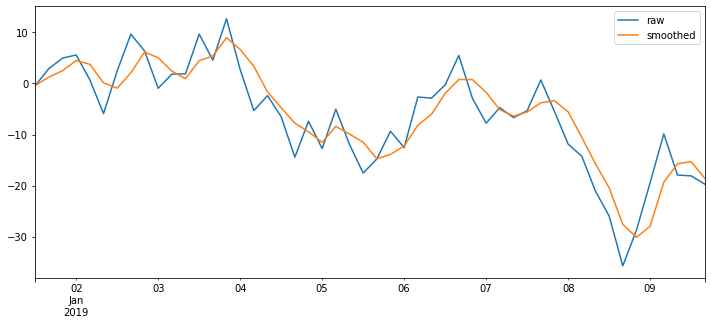

In [5]:
dti = pd.date_range(start='2019-01-01 12:00:00', periods=50, freq='4H')
srs = pd.Series(20*(np.random.rand(50)-0.5).cumsum(), index=dti)
## smooth by taking a rolling mean over 12 hr
srs_smoothed = srs.rolling('12H').mean();
## put both series in a DataFrame
df = pd.DataFrame({'raw':srs,'smoothed':srs_smoothed})
## and plot
df.plot(figsize=(12,5))

## Windowing using an arbitrary function

Just like **apply()** on the whole Series / DataFrame, you can use apply() on the rolling window.<br>
Lets say you are not happy with taking the mean, but you want to weigh based on time delta ...

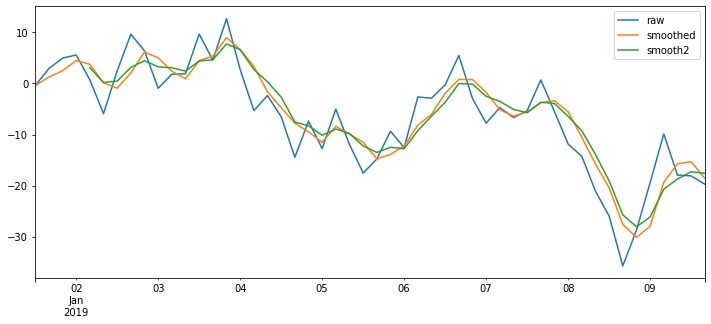

In [16]:
df['smooth2'] = srs.rolling(5)\
                   .apply(  lambda vec: np.dot(vec,np.array([1,2,3,4,5])/15), 
                            raw=True
                         )
df.plot(figsize=(12,5))

And as before, you can also use **agg()**. When calling agg() on a Series, you can pass in a dict with multiple functions:

In [17]:
## same thing, but now using the more generic agg() method (which will work on any function)
df[:10].raw\
       .rolling(3, min_periods=1)\
       .agg({'median': lambda vec: np.median(vec), 
             'range':  lambda vec: max(vec)-min(vec)
            })

,median,range
2019-01-01 12:00:00,-0.415186,0.000000
2019-01-01 16:00:00,1.247414,3.325198
2019-01-01 20:00:00,2.910013,5.375367
2019-01-02 00:00:00,4.960182,2.666958
2019-01-02 04:00:00,4.960182,4.866401
2019-01-02 08:00:00,0.710570,11.489013
2019-01-02 12:00:00,0.710570,8.371748
2019-01-02 16:00:00,2.459706,15.564748
2019-01-02 20:00:00,6.370103,7.193000
2019-01-03 00:00:00,6.370103,10.594279


I hope you get the flexibility of pandas now. It might not be suited as a big-data tool out of the box, and it does have its downside (my biggest annoyance is not having null's for integers). But, once you get fluent in manipulating your data with pandas, there's nothing really like it :-)

# Changeing Shape

There is a good paper by [Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf) on so called 'tidy' data. In practice, data comes in all shapes and sizes, and cleaning, massaging and prepping data into a shape that is usefull for analyzing and visualization takes up most of the time in Data Science workflows.
<br><br>
In tidy data:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

## Prep Data: Read + Some String Manipulation

In [165]:
df = pd.read_csv('data/countrystats.csv')
df.head()

,Country Name,Indicator Name,Year,Value
0,Arab World,"Agriculture, value added (% of GDP)",1952,NaN
1,Arab World,CO2 emissions (metric tons per capita),1952,NaN
2,Arab World,Domestic credit provided by financial sector (...,1952,NaN
3,Arab World,Electric power consumption (kWh per capita),1952,NaN
4,Arab World,Energy use (kg of oil equivalent per capita),1952,NaN


In the countrystats data it looks like the  'Indicator Name' column contains many variables. From a 'tidy'
data point of view the different indicators should all have their own column ...

In [104]:
df['Indicator Name'].value_counts()

Military expenditure (% of GDP)                            3168
Time required to start a business (days)                   3168
Electric power consumption (kWh per capita)                3168
Exports of goods and services (% of GDP)                   3168
Tax revenue (% of GDP)                                     3168
Inflation, GDP deflator (annual %)                         3168
Gross enrollment ratio, primary, both sexes (%)            3168
Prevalence of HIV, total (% of population ages 15-49)      3168
Income share held by lowest 20%                            3168
Industry, value added (% of GDP)                           3168
Net lending (+) / net borrowing (-) (% of GDP)             3168
Population density (people per sq. km of land area)        3168
Domestic credit provided by financial sector (% of GDP)    3168
Life expectancy at birth, total (years)                    3168
Internet users (per 100 people)                            3168
GDP growth (annual %)                   

Lets first clean up the names, so they can be used as column names. To do string manipulation in pandas, we use the string accessor **.str**. Here it is slightly more involved, looks like we want to define a seperate function to do the string manipulation and then ccall *apply()*.
<br><br>
The function needs to:
1. convert to lower case
2. split the string on a character other than space or [a-z] and take the first
3. strip the whitespace
4. replace remaining spaces for underscores

In [166]:
## probably easiest to use a regular expression
import re
## define the function to be applied to all the strings
def indicator_name_to_col_name(s):
    return re.split('[^ a-z0-9]',s.lower())[0].strip().replace(' ','_')
## do it!
df['Indicator Name'] = df['Indicator Name'].apply(indicator_name_to_col_name)

In [167]:
## rename the columns
df.rename(columns={'Country Name':   'location',
                   'Indicator Name': 'indicator',
                   'Year':           'year',
                   'Value':          'value'
                  },
          inplace=True
         )

For the purpose of showing the functionality, lets prune the data:

In [168]:
df = df[  (df.location.isin(['Argentina','Sweden','United Kingdom'])) & 
          (df.year > 1990) &
          df.indicator.isin(['agriculture', 'services', 'tax_revenue'])
       ]

In [169]:
df.head(n=10)

,location,indicator,year,value
58482,Argentina,agriculture,1992,5.990787
58506,Argentina,services,1992,63.325216
58507,Argentina,tax_revenue,1992,5.547922
63342,Sweden,agriculture,1992,2.878552
63366,Sweden,services,1992,68.331841
63367,Sweden,tax_revenue,1992,17.387012
63828,United Kingdom,agriculture,1992,1.343506
63852,United Kingdom,services,1992,70.630330
63853,United Kingdom,tax_revenue,1992,24.280316
65610,Argentina,agriculture,1997,5.673367


## Unstack

Use unstack to 'unstack' a level of the row index by moving it to the column index.<br>
Sound complicated, it is not:
1. create a more meaningfull index for the DataFrame: location, indicator, year
2. unstack the indicator

In [170]:
## step (1) create the multi-index
df.set_index(['location','year','indicator'], inplace=True)

In [188]:
unstack_loc = df['value'].unstack(level='location')
## clean up the multi index
unstack_loc.columns.rename(None, inplace=True)
unstack_loc.reset_index(inplace=True)
## print the result
unstack_loc

,year,indicator,Argentina,Sweden,United Kingdom
0,1992,agriculture,5.990787,2.878552,1.343506
1,1992,services,63.325216,68.331841,70.630330
2,1992,tax_revenue,5.547922,17.387012,24.280316
3,1997,agriculture,5.673367,2.416412,1.107222
4,1997,services,64.798081,67.168772,71.911238
5,1997,tax_revenue,8.690086,27.680374,24.013399
6,2002,agriculture,10.822087,1.842202,0.803050
7,2002,services,56.777627,68.610732,75.595317
8,2002,tax_revenue,9.818958,26.852696,25.077431
9,2007,agriculture,8.781971,1.585659,0.628423


In [190]:
unstack_yr = df['value'].unstack(level='year')
## clean up the multi index
unstack_yr.columns.rename(None, inplace=True)
unstack_yr.reset_index(inplace=True)
## print the result
unstack_yr

,location,indicator,1992,1997,2002,2007
0,Argentina,agriculture,5.990787,5.673367,10.822087,8.781971
1,Argentina,services,63.325216,64.798081,56.777627,58.906741
2,Argentina,tax_revenue,5.547922,8.690086,9.818958,NaN
3,Sweden,agriculture,2.878552,2.416412,1.842202,1.585659
4,Sweden,services,68.331841,67.168772,68.610732,68.095541
5,Sweden,tax_revenue,17.387012,27.680374,26.852696,28.448860
6,United Kingdom,agriculture,1.343506,1.107222,0.803050,0.628423
7,United Kingdom,services,70.630330,71.911238,75.595317,77.829828
8,United Kingdom,tax_revenue,24.280316,24.013399,25.077431,25.783890


In [191]:
unstack_ind = df['value'].unstack(level=2)
## clean up the multi index
unstack_ind.columns.rename(None, inplace=True)
unstack_ind.reset_index(inplace=True)
## print the result
unstack_ind

,location,year,agriculture,services,tax_revenue
0,Argentina,1992,5.990787,63.325216,5.547922
1,Argentina,1997,5.673367,64.798081,8.690086
2,Argentina,2002,10.822087,56.777627,9.818958
3,Argentina,2007,8.781971,58.906741,NaN
4,Sweden,1992,2.878552,68.331841,17.387012
5,Sweden,1997,2.416412,67.168772,27.680374
6,Sweden,2002,1.842202,68.610732,26.852696
7,Sweden,2007,1.585659,68.095541,28.448860
8,United Kingdom,1992,1.343506,70.630330,24.280316
9,United Kingdom,1997,1.107222,71.911238,24.013399


In [207]:
##df['value'].unstack(level=2)\
##           .pipe(lambda df: df.columns.rename(None, inplace=True); df)
##           .pipe(lambda df: df.reset_index(inplace=True); df)

## Stack

As expected, stack does the exact oposite:

In [218]:
orig_stacked = unstack_ind.set_index(['location','year'])\
                          .stack()\
                          .reset_index()\
                          .rename(columns={'level_2':'indicator',0:'value'})
orig_stacked

,location,year,indicator,value
0,Argentina,1992,agriculture,5.990787
1,Argentina,1992,services,63.325216
2,Argentina,1992,tax_revenue,5.547922
3,Argentina,1997,agriculture,5.673367
4,Argentina,1997,services,64.798081
5,Argentina,1997,tax_revenue,8.690086
6,Argentina,2002,agriculture,10.822087
7,Argentina,2002,services,56.777627
8,Argentina,2002,tax_revenue,9.818958
9,Argentina,2007,agriculture,8.781971


## Pivot Table

# Merging

# Split-Apply-Combine

In [ ]:
df = pd.read_csv('data/drinksbycountry.csv')

In [ ]:
df.head()

In [ ]:
df.to_csv('data/drinksbycountry.csv',index=False)

## GroupBy

# Basic Visualizing

Jupyter / pandas has some usefull facitilies to highlight elements in the output.<br>
It also has some plot methods directly defined on the Series / DataFrame.<br>

In [ ]:
## lets create a DataFrame with the same row & column index
df = pd.DataFrame(np.random.randn(4,3), index=[1,2,3,4], columns=[1,2,3])
df

In [ ]:
## return some css styling based on the value
def vis_highlight_negative(cell):
    return(f"{'color: blue' if (cell < -1) else 'color: black'}; " +
           f"{'background: yellow' if (cell < -1) else ''}"
          )

In [ ]:
## applymap: function gets called for each cell in the DataFrame
df.style.applymap(vis_highlight_negative)

In [ ]:
def vis_highlight_column_max(srs):
    cmax = srs.max()
    cmin = srs.min()
    bg   = {0: '', 1: 'background: red', 2: 'background: green'}
    return([bg[1*(cell==cmin) + 2*(cell==cmax)] for cell in srs])

In [ ]:
df.style.apply(vis_highlight_column_max)

Timeseries plots

In [ ]:
srs = pd.Series(np.random.randn(12).cumsum(), index=pd.date_range(start='31-01-2019', freq='M', periods=12))

In [ ]:
srs.plot();

In [ ]:
srs.plot(figsize=(12,5), color='red', grid=(True,True));

# Read / Write External Data

In [ ]:
df1 = pd.read_csv('data/Xbox 3-day auctions.csv')

In [ ]:
df2 = df1.loc[df1.bidder == 'parakeet2004']
df2

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/'
                 'cb5392c35661370d95f300086accea51/raw/'
                 '8e0768211f6b747c0db42a9ce9a0937dafcbd8b2/'
                 'indicators.csv')

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.head()

In [ ]:
df.to_csv('data/countrystats.csv', index=False)

In [ ]:
df = pd.read_csv('data/countrystats.csv')

In [ ]:
df.dtypes